# Modelos AR - MA - ARMA -ARIMA 
Notas de clase sobre los metodos ARMA en series de tiempo usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre la metodología Box-Jenkins en series de tiempo usando **R** en el contexto de la analítica. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

#### Contenido

> 
* [Procesos Autorregresivos AR](#Procesos-Autorregresivos-AR)
    * [Proceso Autoregresivo de Orden 1](#Proceso-Autoregresivo-de-Orden-1)
    * [Simulacion AR](#Simulacion-AR)
    * [Pronostico con proceso AR](#Pronostico-con-proceso-AR)
    * [Serie filtrada AR](#Serie-filtrada-AR)
    * [Estimación proceso AR](#Estimación-proceso-AR)
        * [Calculo de los residuales del modelo AR](#Calculo-de-los-residuales-del-modelo-AR)
    * [Diagnostico de los residuales](#Diagnostico-de-los-residuales)
* [Procesos de medias moviles MA](#Procesos-de-medias-moviles-MA)
    * [Simulación MA](#Simulación-MA)
    * [Serie filtrada MA](#Serie-filtrada-MA)
    * [Estimación proceso MA](#Estimación-proceso-MA)
        * [Calculo de los residuales del modelo MA](#Calculo-de-los-residuales-del-modelo-MA)
        * [Diagnostico de los residuales](#Diagnostico-de-los-residuales)
    * [Pronostico con proceso MA](#Pronostico-con-proceso-MA)
* [Procesos autorregresivos de media movil ARMA](#Procesos-autorregresivos-de-media-movil-ARMA)
    * [Simulación de un proceso ARMA](#Simulación-de-un-proceso-ARMA)
    * [Estimacion del modelo ARMA](#Estimacion-del-modelo-ARMA)
    * [Pronostico del modelo ARMA](#Pronostico-del-modelo-ARMA)
* [Prueba de Raiz Unitaria-Dickey-Fuller](#Prueba-de-Raiz-Unitaria-Dickey-Fuller)
    * [Diferenciación de la serie de tiempo](#Diferenciación-de-la-serie-de-tiempo)
* [Proceso autorregresivo integrado de media móvil ARIMA](#Proceso-autorregresivo-integrado-de-media-móvil-ARIMA)
    * [Simulación proceso ARIMA](#Simulación-proceso-ARIMA)
    * [Estimacion modelo ARIMA](#Estimacion-modelo-ARIMA)
    * [Pronostico modelo ARIMA](#Pronostico-modelo-ARIMA)

**Bibliografía**.

> [Bibliografia aquí](Vinculo aquí)

---

In [1]:
## Cargue la siguiente librería
library(forecast)
library(tseries)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.2 



# Procesos Autorregresivos AR

[Contenido](#Contenido)

Un proceso autorregresivo es un ejemplo de un paseo aleatorio; en este tipo de procesos los datos futuros dependen linealmente de los datos historicos. El modelo se define como:

$$Y_t = C + \sum_{i=1}^p \phi_1 Y_{t-i} + \epsilon_t $$

Donde: 

* $C$: Es una constante 
* $\phi_1,...,\phi_p$: Son los parametros del modelo.
* $\epsilon_t$: Es ruido blanco.

Note que la ecuación del modelo autorregresivo es un modelo de regresión lineal entre la serie $Y_t$ y sus valores pasados o rezagados. Por lo cual recibe el nombre de autorregresivo.

## Proceso Autoregresivo de Orden 1


[Contenido](#Contenido)

En este proceso de orden 1, la variable $Y_t$ depende del valor rezagado $Y_{t-1}$.

$$ Y_t= \phi Y_{t-1} + \epsilon_t $$

Un proceso estocastico es estacionario si su media y varianza son constantes en el tiempo; los modelos autorregresivos deben ser estacionarios.

Para verificar que el proceso  $AR(1)$ es estacionario se debe satisfacer lo siguiente:

* a. **Estacionario en media**

$$E(Y_t) = E( Y_t = \phi Y_{t-1} + \epsilon_t ) = \phi E(Y_{t-1})  $$

Para que el proceso sea estacionario, la media debe ser constante en el tiempo, por tanto:

<p>$$E(Y_t) =  \phi E(Y_{t-1})  $$</p>
<p>$$(1-\phi) E(Y_t) = 0 $$</p>
<p>$$E(Y_t) =  \frac {0} {1-\phi}  $$</p>

De esta manera, para que el proceso sea estacionario $\phi \neq 0$


* b. **Estacionario en covarianza**

Para que el proceso $AR(1)$ sea estacionario, la varianza debe ser constante en el tiempo, por tanto:


$$ \gamma_0 = E( Y_t - E(Y_{t-1}))^2 = E(\phi Y_{t-1} + \epsilon_t - 0)^2 = \phi^2 V(Y_{t-1}) + \sigma^2  $$


Dada la autocorrelación del proceso:

$$ E(Y_{t-1} \epsilon_t ) = E[(Y_{t-1}-0)(\epsilon_t - 0)] = cov(Y_{t-1} \epsilon_t) = 0 $$ 

Teniendo en cuenta que el proceso es estacionario:

$$ E(Y_{t-1})^2 = V(Y_{t-1}) = V(Y_t)= \gamma_0 $$

Luego se tiene que:

$ \gamma_0 = \phi \gamma_0 + \sigma^2 $

Entonces:

$$ \gamma_0 = \frac {\sigma^2}{1-\phi^2}$$
    
Para que el proceso sea estacionario con varianza constante en el tiempo, resulta necesario que $|\phi| < 1$

## Simulacion AR

[Contenido](#Contenido)

In [2]:
## Simulación de un proceso AR(1)

set.seed(123)

x <- c(rep(NA,50))                 # Vector donde se almacenan los datos

inicio <- 5                        # Valor de inicio del proceso
phi <- 0.8                         # Parametro phi de la ecuación 
et <- rnorm(50,0,1)                # Error asociado al proceso 
sigma<- 1.5                        # Valor sigma para error  
yt <- et*sigma                     # Actualización de error 

x[1] <- inicio                     # Asignación valor incial de la serie


for (i in 2:length(x)) {           # Inicia en 2 porque necesita valor anterior 
  
  x[i] <- x[i-1]*phi + yt[i]       # Formula del proceso
  
}

x <- ts(x, frequency=1)

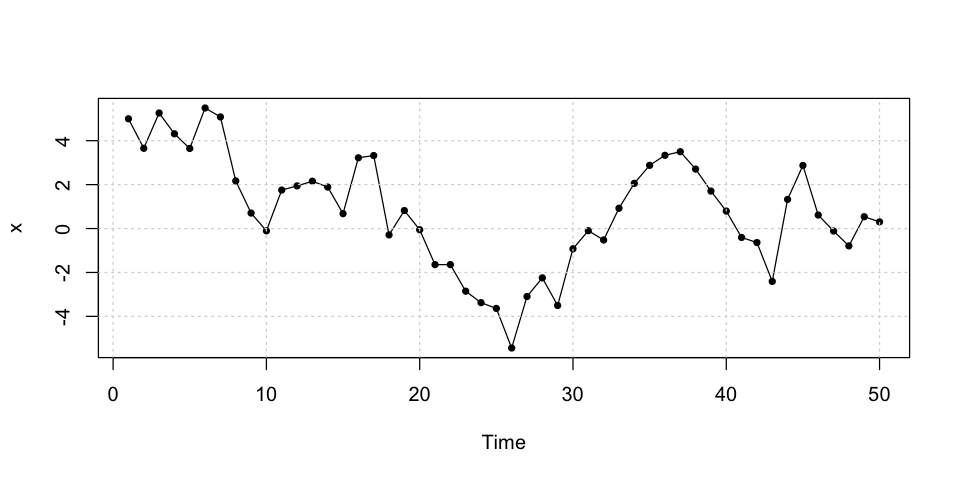

In [3]:
options(repr.plot.width=8, repr.plot.height=4)
plot.ts(x,            # Datos de la serie de tiempo
        type="o",     # tipo de gráfico: o - overplotted
        pch=20)       # tipo de marcador de los puntos)      

grid()                # Agrega malla

## Pronostico con proceso AR

[Contenido](#Contenido)

Sea la serie de tiempo $Y_t$ en un tiempo $t$

$$Y_t = \phi_0 + \phi_1 Y_{t-1} + \epsilon_t ~~\text{ , }~~ \epsilon_t \sim N(0,\sigma^2) $$

Entonces:

$$Y_t \sim N(\mu = \phi_0 + \phi_1 Y_{t-1} ~~,~~ \sigma^2)$$

Para realizar el pronóstico $Y_{t+1}$ se puede escribir como:

$$Y_{t+1} = \phi_0 + \phi_1 Y_t + \epsilon_{t+1} $$,  $$\epsilon_{t+1} \sim N(0,\sigma^2) $$


Donde $Y_t = \phi_0 + \phi_1 Y_{t-1} + \epsilon_t $, entonces:


$$Y_{t+1} = \phi_0 + \phi_1 [\phi_0 + \phi_1 Y_{t-1} + \epsilon_t] + \epsilon_{t+1} $$

Teniendo en cuenta que:

<p> $Y_t \sim N(\mu = \phi_0 + \phi_1 Y_{t-1} ,\sigma^2)$ </p>

<p> $\epsilon_{t+1} \sim N(0,\sigma^2)$ </p>


El valor $Y_{t+1}$ es una suma de Normales $N(\mu_1, \sigma_1^2)$ y $N(\mu_2, \sigma_2^2)$. Por lo cual:

$$ Y_{t+1} \sim N(\mu_1 + \mu_2,\sigma_1^2 + \sigma_2^2)$$

<img src="images/pron-ar.png" width=600>


In [4]:
## Pronóstico de la serie  
## un periodo adelante
set.seed(099)

et.for= rnorm(1)                    # Error asociado a E(t+1)
x.for = x[length(x)]*phi + et.for   # Ultimo dato de la serie * Parametro Phi

x.for



[1] 0.4580604

## Serie filtrada AR

[Contenido](#Contenido)

El filtrado de la serie se expresa como

$$ Y_t - \phi Y_{t-1} =  \epsilon_t $$

Donde la serie filtrada resulta ser el error del proceso.

In [5]:
## Filtrado de la serie

xf <- c(rep(NA,length(x)-1))    # Vector donde se almacenan serie filtrada
  
for (i in 2:length(x)) {
  
  xf[i-1]<- x[i]-x[i-1]*phi
  
}

xf <- ts(xf, 
         frequency = 1)

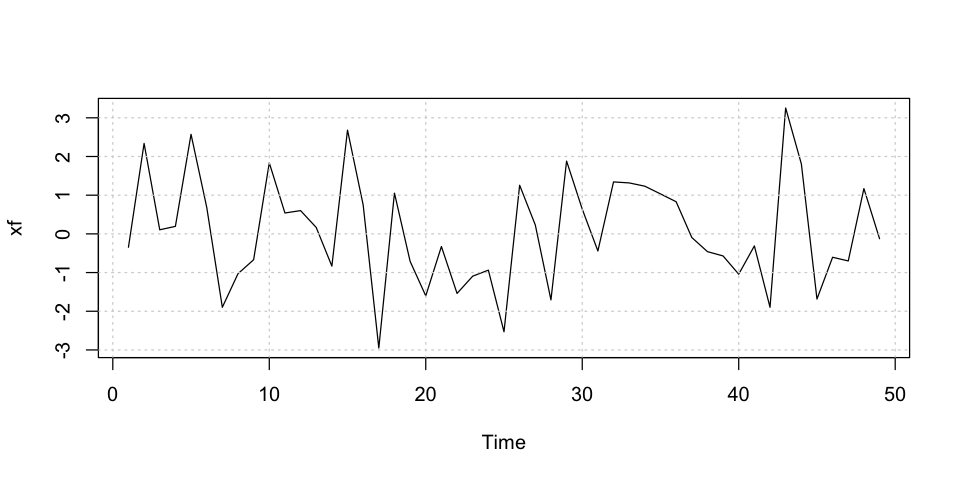

In [6]:
plot.ts(xf)         # Gráfica del serie filtarada
grid()              # Agrega malla

## Estimación proceso AR

[Contenido](#Contenido)

> [`ar.ols {stats}`](https://stat.ethz.ch/R-manual/R-patched/library/stats/html/ar.ols.html)

`ar.ols` estima un modelo autorregresivo por el metodo de minimos cuadrados ordinarios (*ols* por su sigla en ingles)

In [7]:
## Estimacion ar.ols

ar <- ar.ols(x,              # Datos a modelar
             aic = T,        # Criterio AIC 
             order.max = 1,  # Proceso maximo AR(1) 
             intercept = F,  # Intercepto falso
             demean = F)     # Omite un valor medio que automaticamente calcula ar.ols
ar


Call:
ar.ols(x = x, aic = T, order.max = 1, demean = F, intercept = F)

Coefficients:
     1  
0.8175  

Order selected 1  sigma^2 estimated as  1.915

---

**Ejercicio.--** Convierta el siguiente conjunto de datos en un objeto `ts` y ajuste un modelo AR(p)  para los primeros 48 datos de la serie. Deje 2 para pronóstico.

**Ejercicio.--** Imprima el modelo obtenido.

---

Para calcular los valores ajustados del modelo autorregresivo que se obtuvo anteriormente, se puede realizar de manera manual o por medio de la función `fitted` como se presenta a continuación:

> [`fitted{forecast}`](https://cran.r-project.org/web/packages/forecast/forecast.pdf)

In [8]:
## Valores ajustados del modelo - manual

x.fit<-rep(NA,50)               # Vector valores ajustados
x.fit[1]<- x[1]                 # Primer valor ajustado

for (i in 2:length(x.fit)) { 
    
  x.fit[i] = ar$ar * x[i-1]     # Dato * Parametro phi estimado
  
}

In [9]:
## Tambien puede calcular los valores 
## ajustados del modelo así:

x.fit2 <- fitted(ar)   # Fitted extrae los valores ajustados


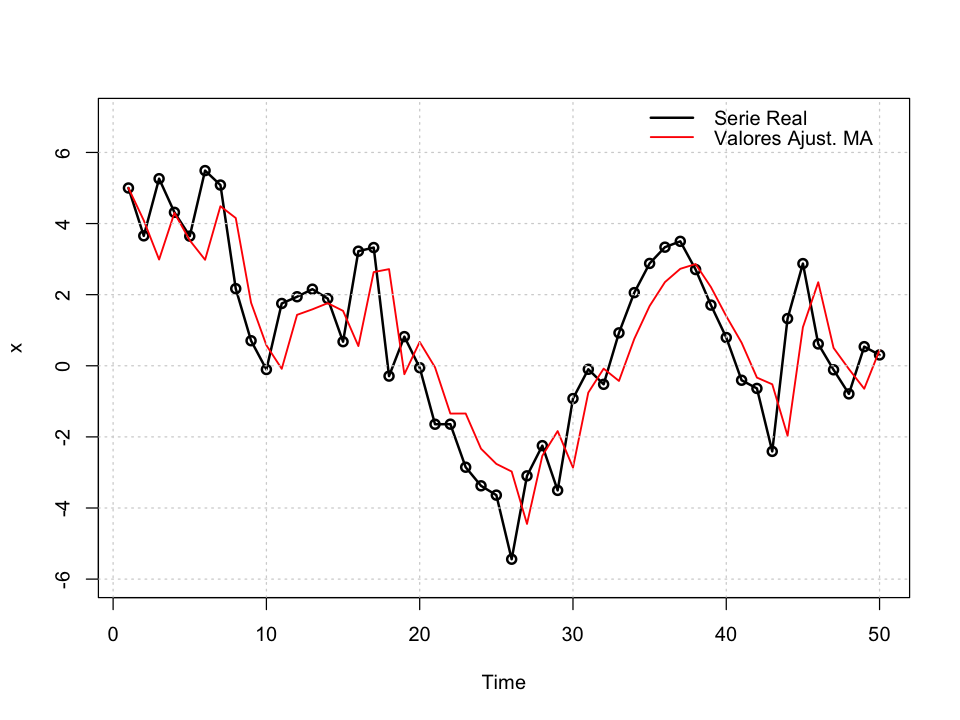

In [10]:
## Gráfica valores ajustados vs reales

options(repr.plot.width=8, repr.plot.height=6)

plot(x,                                                   # Datos serie real
     type="o",                                            # tipo de gráfico: o - overplotted
     lwd=2,                                               # Grosor de linea
     col="black",                                         # Color de linea
     ylim=c(-6,7))                                        # Limites eje y

lines(x.fit,lwd=1.5,col="red")                               


legend( "topright",                                        # posicion
        c("Serie Real", "Valores Ajust. MA"),              # texto
        lwd = c(2, 1.5),                                   # grosor lineas
        col = c('black', 'red'),                           # color lineas
        bty = "n")                                         # caja alrededor de la leyenda



grid()  

---

**Ejercicio.--** Realice la gráfica de ajuste vs datos reales


**Ejercicio.--** Realice el pronóstico del modelo dos periodos hacia adelante utilizando la ecuación de pronóstico.

---

---

### Calculo de los residuales del modelo AR

[Contenido](#Contenido)

In [11]:
## Metodo 1. Manual
r1 <- x - x.fit

El modelo ajustado por medio de la función `ar.ols` y asignado a la variable "ar" tienen varios parametros internos. Para poder ver cual es la estructura interna y su composición utilice `str( )`. Los residuales del modelo ya estan calculados internamente y se calculan: 

In [12]:
## Metodo 2. Automatico
r2 <- ar$resid                # El modelo ajusto contiene los residuales

In [13]:
## Comparación

head(r1)
head(r2)

[1]  0.00000000 -0.43281759  2.27406709  0.01362618  0.11837054  2.50875284

[1]          NA -0.43281759  2.27406709  0.01362618  0.11837054  2.50875284

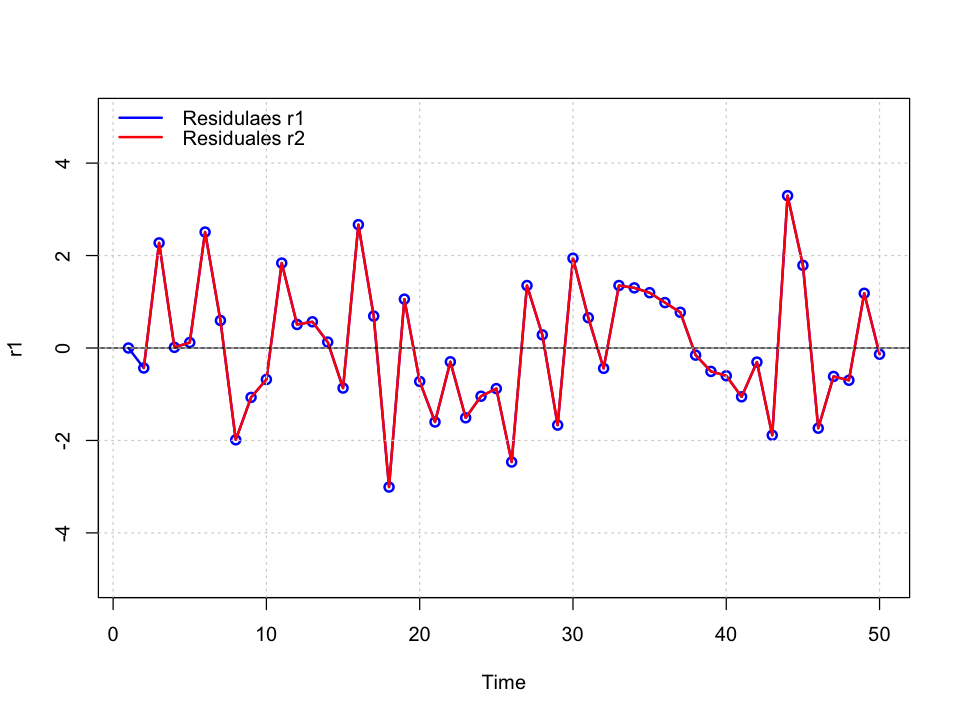

In [50]:
## Gráfica de los residuales 
options(repr.plot.width=8, repr.plot.height=6)

plot(r1,                                                # Datos residuales 1
     type="o",                                          # tipo de gráfico: o - overplotted
     lwd=2,                                             # Grosor de linea
     col="blue",                                        # Color de linea
     ylim=c(-5,5))                                      # Limites eje y

lines(r2,lwd=2,col="red")                               


legend( "topleft",                                       # posicion
        c("Residulaes r1", "Residuales r2"),             # texto
        lwd = c(2, 2),                                   # grosor lineas
        col = c('blue', 'red'),                          # color lineas
        bty = "n")                                       # caja alrededor de la leyenda

abline(h=0,col="black")                                  # Linea en 0

grid()                                                   # Agrega malla.

Los residuales calculados por cada metodo `r1` y `r2` son exactamente los mismos. Se realizó por ambos metodos con el fin de explicar la metodología que se utiliza. En adelante para el diagnostico, se trabajará con r1.  

## Diagnostico de los residuales

[Contenido](#Contenido)

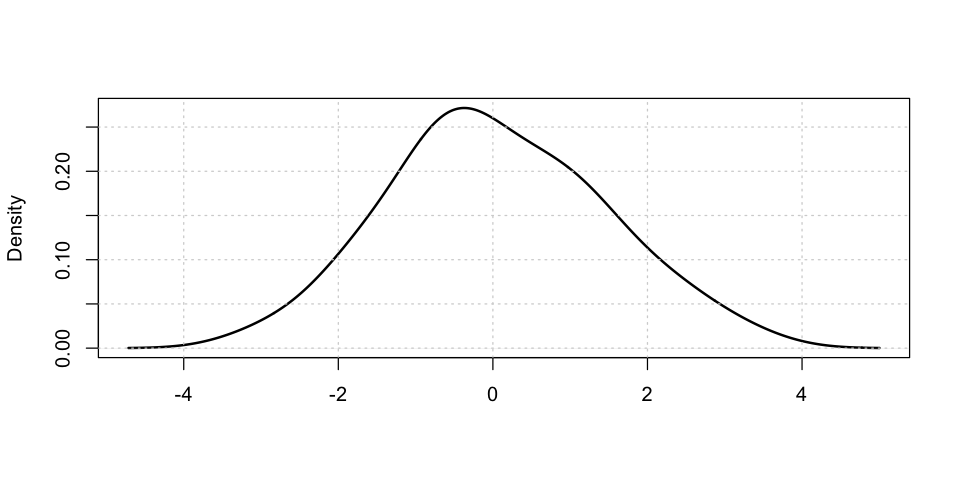

In [15]:
## Densidad

# options(repr.plot.width=8, repr.plot.height=4)

plot(density(r1),                   # Densidad residuales
     main="",                       # Sin titulo
     xlab="",                       # Sin nombre eje x
     lwd=2)                         # Grosor de linea
grid()                              # agrega malla

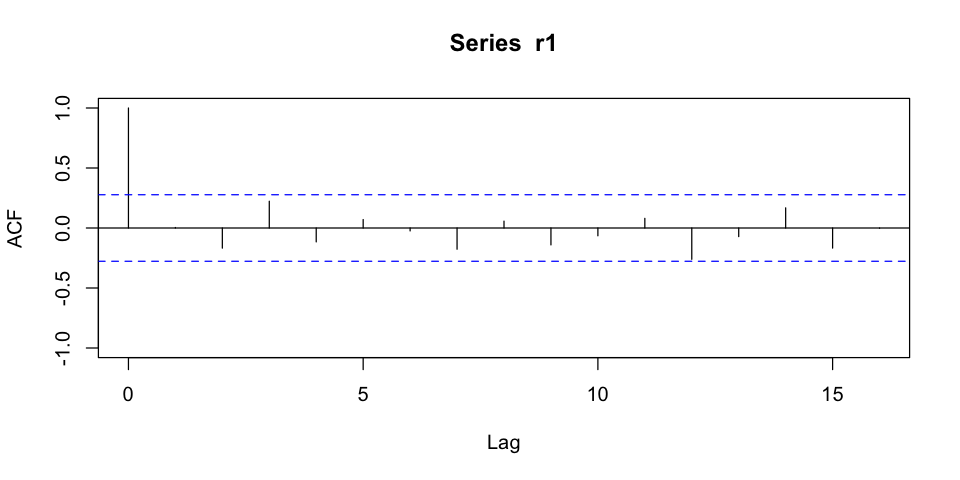

In [16]:
## Prueba ACF
# options(repr.plot.width=8, repr.plot.height=4)

acf(r1,
    na.action = na.pass,    # Funcion para valores faltantes
    ylim=c(-1,1))           # Limites eje y


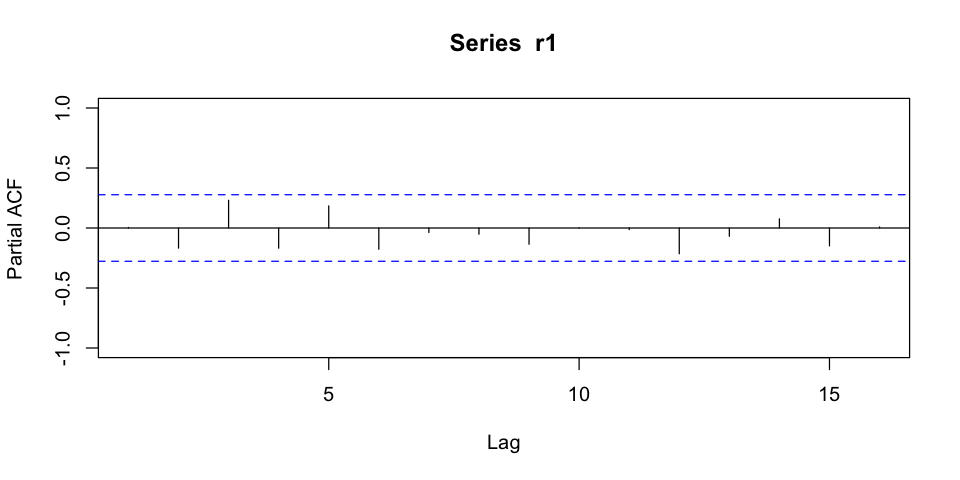

In [17]:
## Prueba PACF
options(repr.plot.width=8, repr.plot.height=4)

pacf1<- pacf(r1,
             na.action = na.pass,   # Funcion para valores faltantes
             ylim=c(-1,1))          # Limites eje y


---

**Ejercicio.--** Realice el diagnostico para los residuales del modelo que ajusto para la serie x.

---

# Procesos de medias moviles MA

[Contenido](#Contenido)

El modelo de medias moviles se define como:

$$ Y_t = \theta_0 + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} +...+ \theta_1 \epsilon_{t-q} - \epsilon_t $$

Donde: 

* $\theta_0$: Es una constante 
* $\theta_1,...,\theta_q$: Son los parametros del modelo.
* $\epsilon_t$: Es ruido blanco.


a. Estacionario en media
    
<p>$$ E(Y_t) = E(\epsilon_t + \theta \epsilon_{t-q})$$</p>
<p>$$ E(Y_t) = E(\epsilon_t)+ \theta E(\epsilon_{t-q})$$</p>
<p>$$ E(Y_t) = 0 $$</p>
 
Es estacionario en media para todo valor del parametro $\theta$
 
b. Estacionario en covarianza

<p>$$\gamma_0 = E(Y_t - E(Y_t))^2 = E(Y_t)^2 = E(\epsilon_t - \theta \epsilon_{t-1})^2 $$</p>
<p>$$\gamma_0 = E(\epsilon_t)^2 + \theta^2 (\epsilon_{t-1})^2 - 2\theta  E(\epsilon_t  \epsilon_{t-1})= \sigma^2 + \theta^2 \sigma^2 - 0 $$</p>
<p>$$\gamma_0 = (1+\theta^2) \sigma^2 < \infty $$</p>

## Simulación MA

[Contenido](#Contenido)

In [18]:
## Simulacion de un proceso MA
set.seed(121)

y<-c(rep(NA,50))                          # Vector donde se almacenan los datos


et <- rnorm(50,0,1)                       # Error asociado al proceso
sigma<- 1.5                               # Valor sigma para error
et<-et*sigma                              # Actualizacion error
theta<-0.9                                # Valor Theta
const<- 0                                 # Constante

y[1]<- et[1]                              # Asignacion valor inicial de la serie

for (i in 2:length(y)) {
  
  y[i] <- const + theta * et[i-1] + et[i] # Formula del proceso
  
}

y=ts(y, frequency=1)

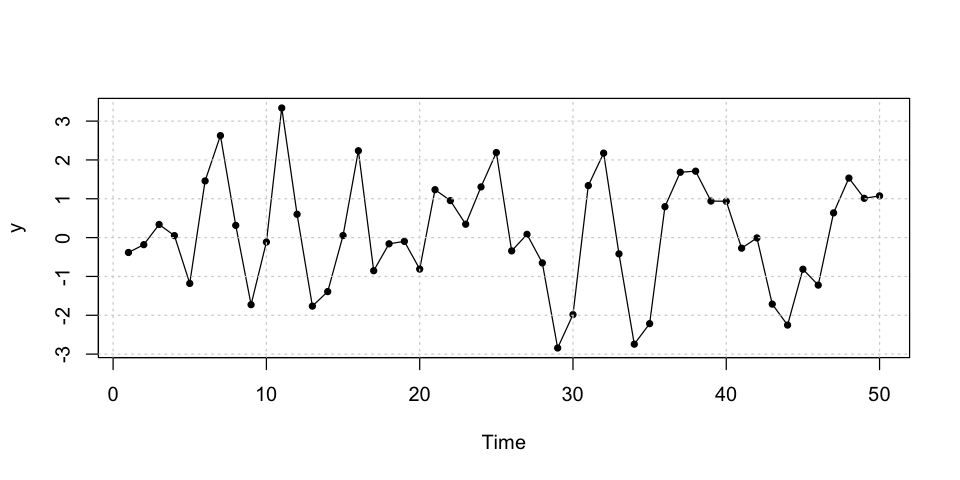

In [19]:
options(repr.plot.width=8, repr.plot.height=4)

plot.ts(y,
       type="o",     # tipo de gráfico: o - overplotted
       pch=20)       # tipo de marcador de los puntos

grid()               # Agrega malla

## Serie filtrada MA

[Contenido](#Contenido)

In [20]:
## Serie filtrada

yf<- c(rep(NA,length(y)-1))    # Vector donde se almacenan serie filtrada

for (i in 2:length(y)) {
  
  yf[i-1] <- y[i] const + theta * et[i-1]
  
}

yf <- ts(yf, frequency=1)

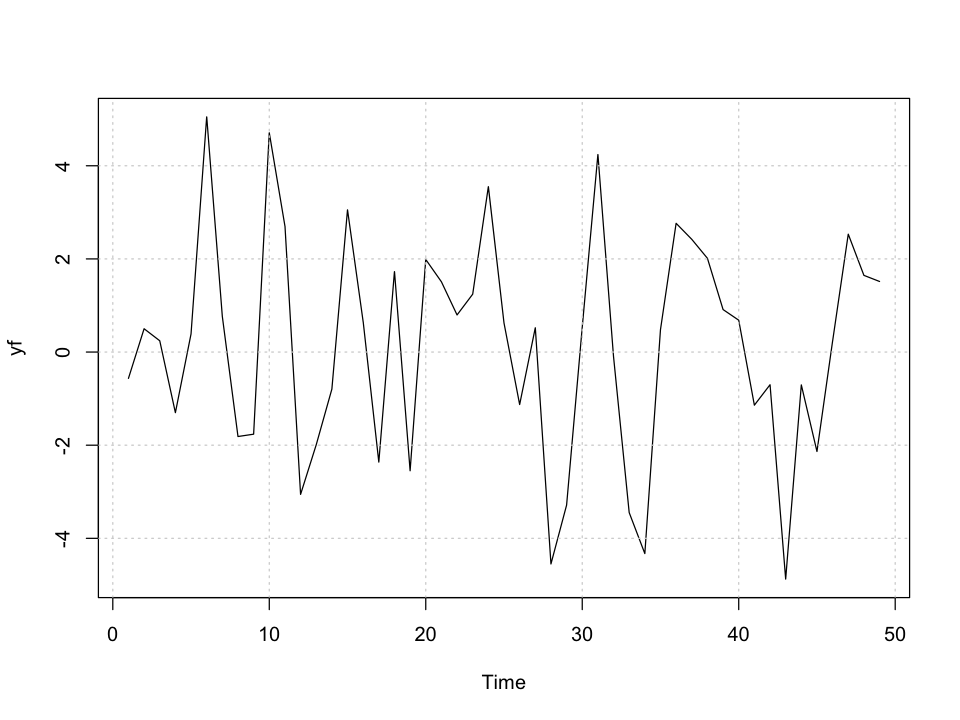

In [51]:
## Grafica
plot.ts(yf)         # Gráfica del proceso
grid()              # Agrega malla

## Estimación proceso MA

[Contenido](#Contenido)

> [`arima{stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/arima.html)

In [22]:
ma <- arima(y,
            order = c(0,0,1),   # (0,0,1) es un proceso MA(1)
            include.mean = F)   
ma


Call:
arima(x = y, order = c(0, 0, 1), include.mean = F)

Coefficients:
         ma1
      0.7792
s.e.  0.1682

sigma^2 estimated as 1.392:  log likelihood = -79.69,  aic = 163.38

---

**Ejercicio.--** Convierta el siguiente conjunto de datos en un objeto `ts` y ajuste un modelo MA(q) para la serie para los primeros 48 datos. Deje 2 para pronóstico.

**Ejercicio.--** Imprima el modelo estimado.

---

Para calcular los valores ajustados del modelo de medias móviles se utilizará la función `fitted` como se presenta a continuación:

In [23]:
## Valores ajustados del modelo
y.fit <- fitted(ma)

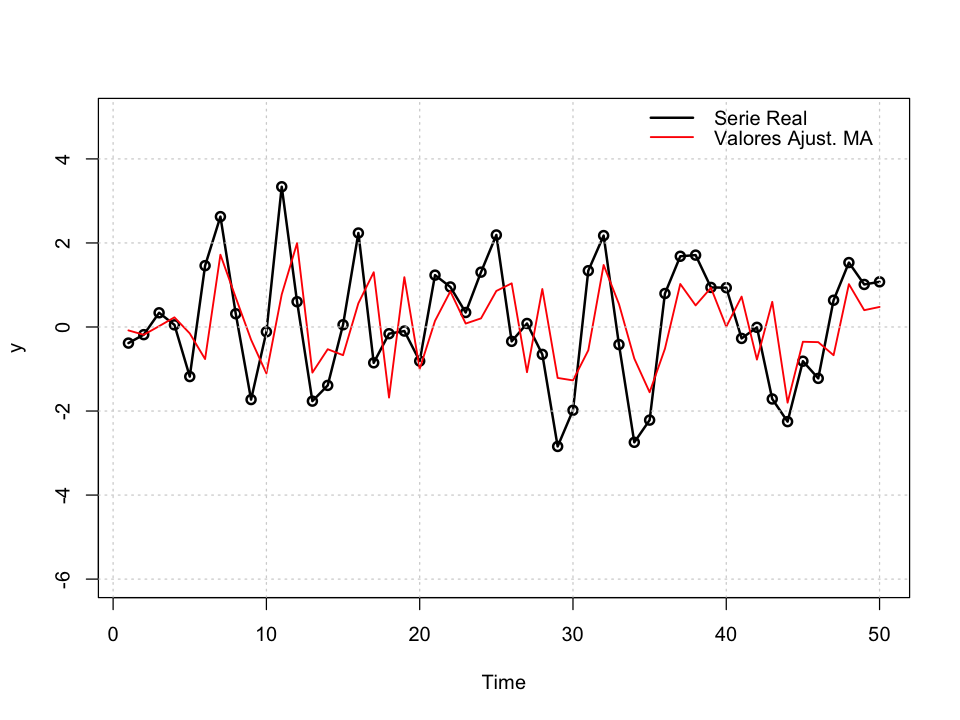

In [24]:
## Gráfica valores ajustados vs reales

options(repr.plot.width=8, repr.plot.height=6)

plot(y,                                                   # Datos serie real
     type="o",                                           # tipo de gráfico: o - overplotted
     lwd=2,                                               # Grosor de linea
     col="black",                                         # Color de linea
     ylim=c(-6,5))                                        # Limites eje y

lines(y.fit,lwd=1.5,col="red")                               


legend( "topright",                                        # posicion
        c("Serie Real", "Valores Ajust. MA"),              # texto
        lwd = c(2, 1.5),                                   # grosor lineas
        col = c('black', 'red'),                           # color lineas
        bty = "n")                                         # caja alrededor de la leyenda

grid()                                                     # Agrega malla        

---

**Ejercicio.--** Realice la gráfica de ajuste vs datos reales

---

### Calculo de los residuales del modelo MA

[Contenido](#Contenido)

El modelo ajustado por medio de la función `arima` y asignado a la variable "ma" tienen varios parametros internos. Para poder ver cual es la estructura interna y su composición utilice `str( )`. Los residuales del modelo ya estan calculados internamente y se calculan: 

In [25]:
### Obtención de los residuales
r <- ma$residuals

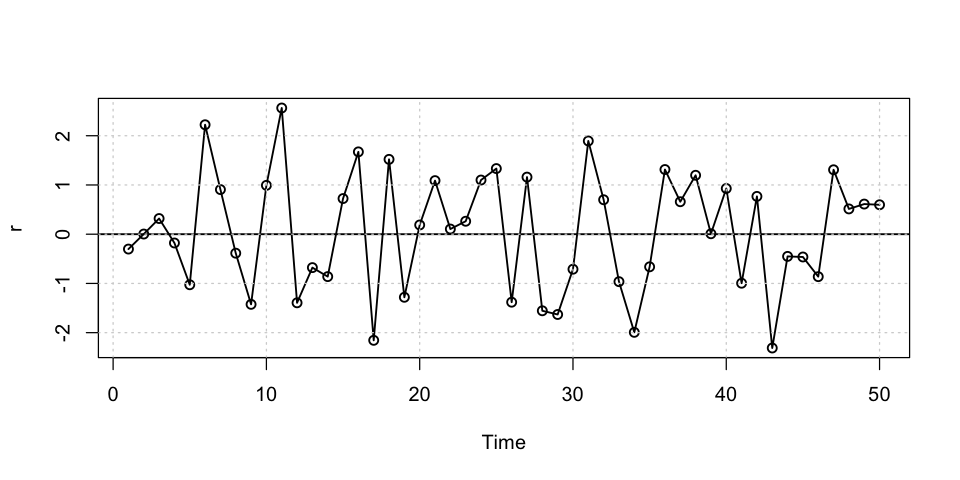

In [26]:
## Gráficas de los residuales 

options(repr.plot.width=8, repr.plot.height=4)

plot(r,                     # Datos residuales 
     type="o",              # Tipo de gráfico: o - overplotted
     lwd=1.5)               # Grosor de linea


abline(h=0,lwd=1.5)         # Linea en 0

grid()                      # Agrega malla

### Diagnostico de los residuales

[Contenido](#Contenido)

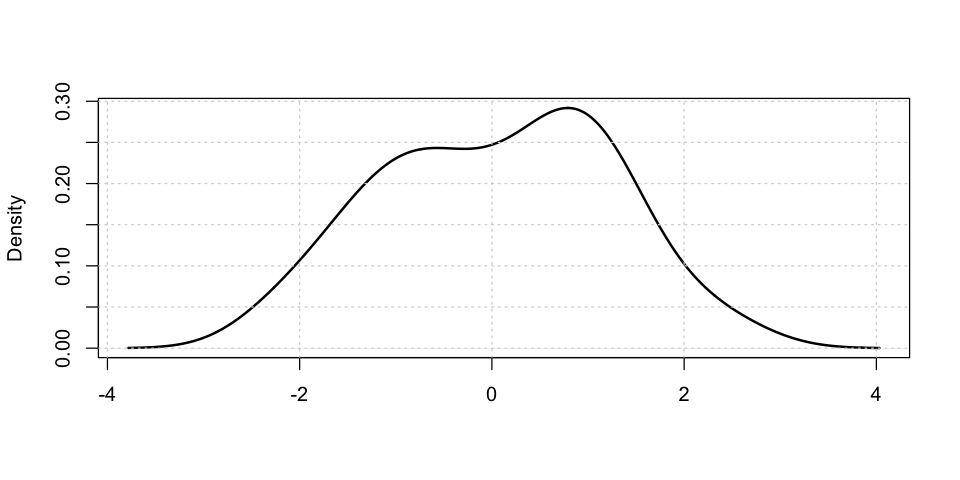

In [27]:
## Densidad
options(repr.plot.width=8, repr.plot.height=4)

plot(density(r),       # Densidad residuales
     main="",          # Sin titulo
     xlab="",          # Sin nombre eje x
     lwd=2)            # grosor de linea
grid()                 # Agrega malla

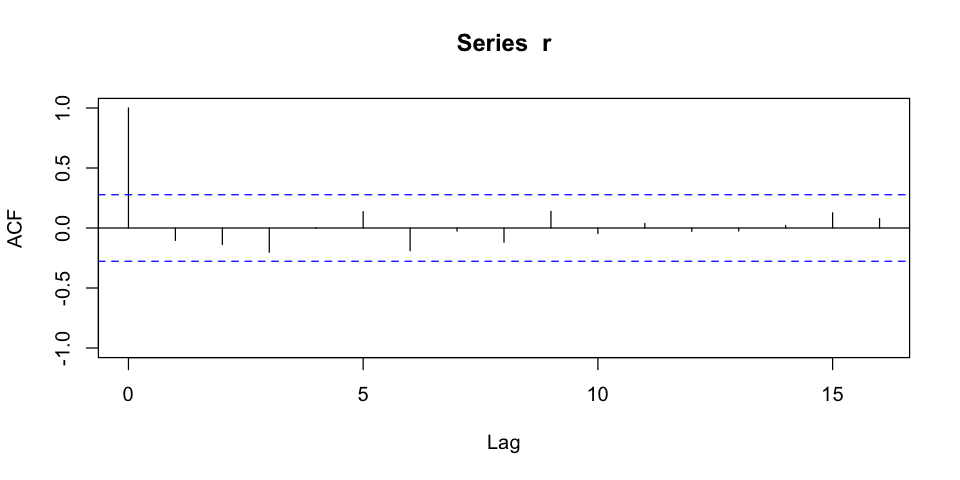

In [28]:
## Prueba ACF
acf(r,
    na.action = na.pass,    # Funcion para valores faltantes
    ylim=c(-1,1))           # Limite eje y


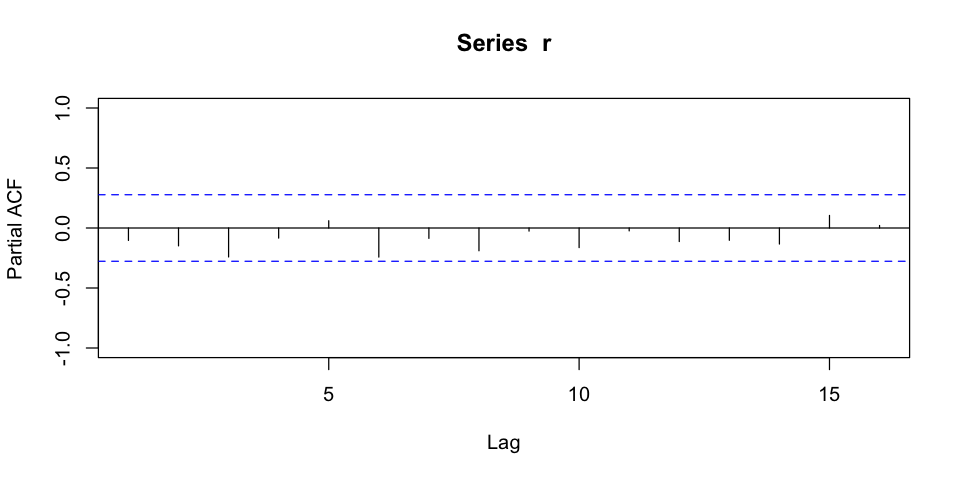

In [29]:
## Prueba PACF
pacf1<- pacf(r,
             na.action = na.pass,  # Funcion para valores faltantes
             ylim=c(-1,1))         # Limite eje y

---

**Ejercicio.--** Realice el diagnostico para los residuales del modelo que ajusto para la serie x.

---

## Pronostico con proceso MA

[Contenido](#Contenido)

>[`predict{stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html)

In [30]:
## Pronóstico proceso AR
y.for<- predict(ma,           # Modelo ajustado por ols
            ,n.ahead=1)       # Número de periodos a pronósticar
y.for

$pred
Time Series:
Start = 51 
End = 51 
Frequency = 1 
[1] 0.4656768

$se
Time Series:
Start = 51 
End = 51 
Frequency = 1 
[1] 1.180035


---

**Ejercicio.--** Realice el pronóstico del modelo y grafique los resultados con los datos reales.

---

# Procesos autorregresivos de media movil ARMA

[Contenido](#Contenido)

Los modelos ARMA son modelos autorregresivos de media movil se componen de una parte AR y la otra MA, siguen la siguiente ecuación:

$$ Y_t= c + \phi_1 Y_{t-1} +...+  \phi_p Y_{t-p}+ \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_m \epsilon_{t-m}  $$

## Simulación de un proceso ARMA

[Contenido](#Contenido)

> [`arima.sim`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/arima.sim.html)

In [31]:
## Simulacion ARMA(1,1)
set.seed(121)                                      # Valor Semilla para resultados

x<-arima.sim(n = 50,                               # Numero de datos
             list(ar = c(0.82,-0.4),               # Parametro phi del proceso AR
                  ma = c(-0.2,0.24)),              # Parametro theta del proceso MA
             innov=rnorm(50,0,1))                  # Error asociado 


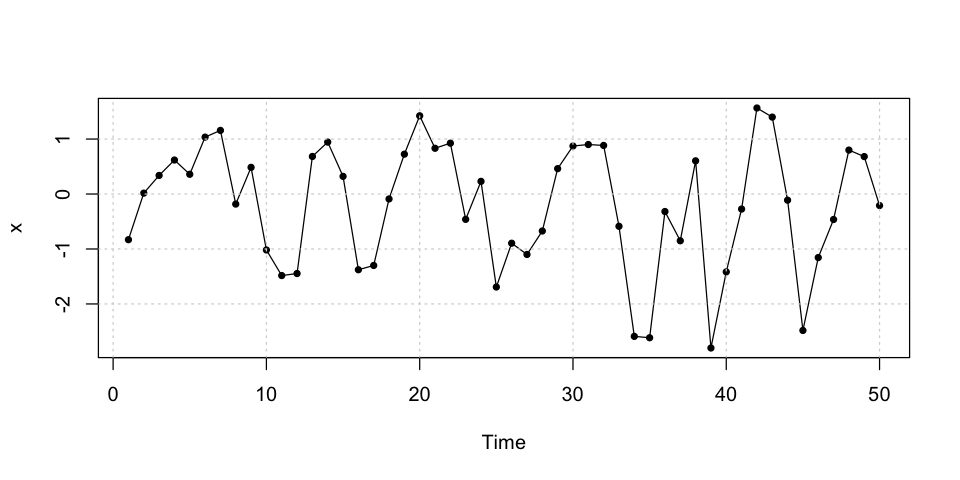

In [32]:
## Gráfica proceso ARMA

options(repr.plot.width=8, repr.plot.height=4)
plot.ts(x,
        type="o",                                  # tipo de gráfico: o - overplotted
        pch=20)                                    # tipo de marcador de los puntos)      

grid()                                             # Agrega malla

---

**Ejercicio.--** Simule un proceso ARMA (1,1) de 50 observaciones utilizando un proceso iterativo como se realizo al comienzo del libro. Utilce:

* $\phi$ (AR) : 0.8926
* $\theta$ (MA) : -0.2152

**Ejercicio.--** Convierta el proceso ARMA generado en un objeto `ts` en R con `freq=1` 

---

## Estimacion del modelo ARMA

[Contenido](#Contenido)

> [`arima{stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/arima.html)

In [33]:
x.fit <- arima(x,order = c(2,0,2),   # (2,0,2) es un proceso ARMA(2,2)
          include.mean = F)   
x.fit


Call:
arima(x = x, order = c(2, 0, 2), include.mean = F)

Coefficients:
         ar1      ar2     ma1     ma2
      0.2063  -0.5052  0.4428  1.0000
s.e.  0.1334   0.1305  0.0588  0.1458

sigma^2 estimated as 0.651:  log likelihood = -63.17,  aic = 136.35

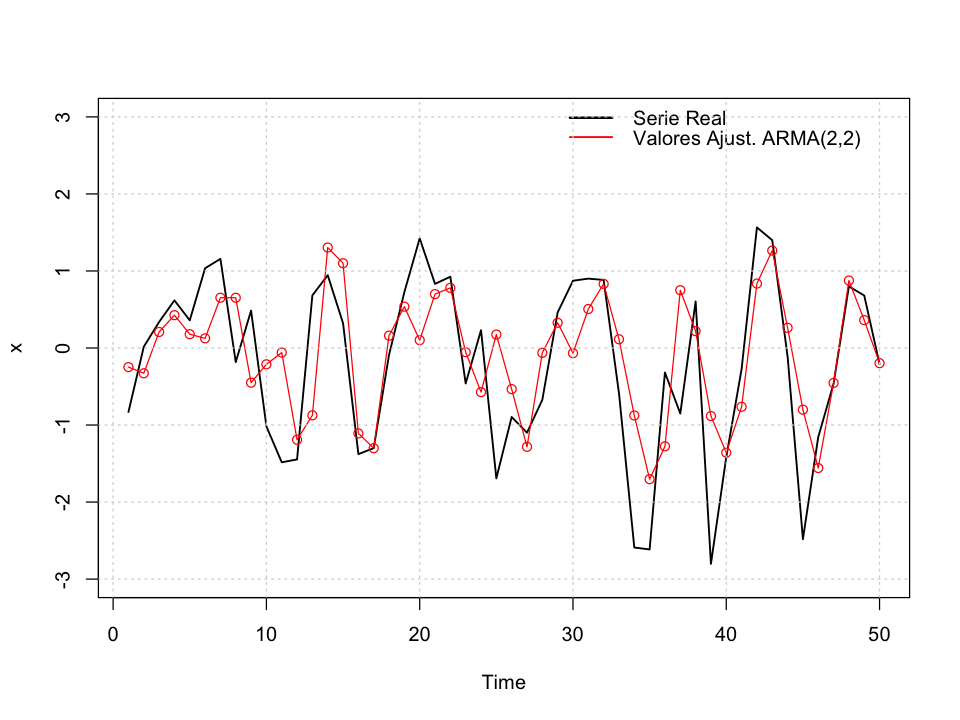

In [34]:
## Grafica de los valores ajustados
options(repr.plot.width=8, repr.plot.height=6)


plot(x,                                                    # Serie real
     type="l",                                             # Tipo de linea
     lwd=1.5,                                              # Grosor linea
     ylim=c(-3,3))

lines(fitted(x.fit),                                       # Valores ajustados ARMA
      type="o",                                            # Tipo linea
      col="red")                                           # Color linea


legend( "topright",                                        # posicion
        c("Serie Real", "Valores Ajust. ARMA(2,2)"),       # texto
        lwd = c(2, 1.5),                                   # grosor lineas
        col = c('black', 'red'),                           # color lineas
        bty = "n")                                         # sin caja alrededor de la leyenda

grid()

---

**Ejercicio.--** Utilice la serie que generó anteriormente para realizar un ajuste de un modelo ARMA para los primeros 45 datos y grafique el ajuste. Deje 5 observaciones para el pronostico.

---

## Pronostico del modelo ARMA

[Contenido](#Contenido)

>[`predict{stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html)

In [35]:
x.for <- predict(x.fit,n.ahead=2)
x.for

$pred
Time Series:
Start = 51 
End = 52 
Frequency = 1 
[1] -0.07960160  0.07689116

$se
Time Series:
Start = 51 
End = 52 
Frequency = 1 
[1] 0.8219568 0.9763276


---

**Ejercicio.--** Utilice el modelo que ajusto para realizar el pronostico de las 5 observaciones y realice la grafica.

---

# Prueba de Raiz Unitaria-Dickey-Fuller

[Contenido](#Contenido)

>[`adf.test`](https://cran.r-project.org/web/packages/tseries/tseries.pdf)

La prueba de Dickey-Fuller es una prueba de hipótesis:

* $H_o$: Existe una raiz unitaria.

* $H_a$: No hay.

Si existe raíz unitaria es un proceso No-Estacionario, lo cual impide utilizar los modelos estudiados. 

In [36]:
## Considere la serie

x <- c(  0.24, -0.45,  0.02,  0.67,
         0.67,  1.41, -0.40,  0.46,
         0.30, -0.27, -1.19, -1.70,
        -1.56, -1.59, -1.19, -1.48,
        -1.93, -2.73, -2.54, -3.63,
        -3.05, -3.12, -3.00, -2.22,
        -1.44, -3.07, -4.09, -4.61,
        -3.90, -3.43, -2.53, -3.05,
        -2.06, -3.33, -2.23, -2.36,
        -2.67, -0.82, -1.12, -0.54,
        -0.33,  0.66, -0.86, -1.87,
        -1.86, -1.62,  0.18,  0.61,
         1.59,   0.65  )

x <- ts(x,freq=1)


In [37]:
## Prueba de raiz unitaria (Dickey-Fuller)
adf.test(x)


	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -1.194, Lag order = 3, p-value = 0.8976
alternative hypothesis: stationary


El valor $p$ = 0.8976 lo cual indica que la probabilidad de equivocarse dado que se rechace la hipótesis nula es el 89%, por tanto se acepta la hipótesis nula y se confirma que existe raíz unitaria en el proceso y la serie es no-estacionaria.

## Diferenciación de la serie de tiempo

[Contenido](#Contenido)

>[`diff {base}`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/diff.html)


Para utilizar esta metodología  para el modelamiento y posterior pronóstico de series de tiempo se debe verificar la estacionaridad de la serie. Esta se puede diagnosticar mediante el test de dickey-fuller que se realizó anteriormente, si la serie resulta no estacionaria se debe diferenciar la serie hasta alcanzar la estacionariedad.

Sea $Y_t$ una serie de tiempo, su diferenciación simple esta dada por:

$$ Y_t - Y_{t-1}$$

In [38]:
## Ejemplo de diferenciación simple

x.d <- diff(x)  # Serie X con presencia de raiz Unit.

In [39]:
## Prueba de raiz unitaria-Dickey-Fuller

adf.test(x.d)

Warning message in adf.test(x.d):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  x.d
Dickey-Fuller = -5.3973, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


El valor $p$ es menor a 0.01 lo cual indica que la probabilidad de equivocarse dado que rechace la hipótesis nula es es menor a 1%, por tanto se rechaza la hipótesis nula y se confirma la serie diferenciada es estacionaria ya que no existe presencia de raíz unitaria.

# Proceso autorregresivo integrado de media móvil ARIMA

[Contenido](#Contenido)

El modelo autorregresivo integrado de media movil utilizacion diferenciación de la serie y regresiones para modelar la serie de tiempo, se considera que es un modelo dinamico ya que los datos de predicciones dependen de comportamientos pasados y no de variables externas a la serie.

El proceso $ARIMA(p,d,q)$, donde $p$,$d$ y $q$ son numeros enteros no negativos, se puede representar matematicamente como:

$$Y_t = -(\Delta^dY_t - Y_t) + \phi_0 + \sum_{i=1}^p \phi_i \Delta^dY_{t-i} - \sum_{i=1}^q  \theta_i \epsilon_{t-i} + \epsilon_t $$

Donde:

* $\phi_0$: Es una constante

* $d$: Corresponde a las $d$ diferencias que sean necesarias para convertir la serie en estacionaria

* $\phi_1,...,\phi_p$: Son los parametros asociados a la parte autorregresiva del modelo.

* $\theta_1,...,\theta_q $: Son los parametros asociados a la parte de medias moviles del modelos

* $\epsilon_t$: Es el termino de error.


Hay que tener en cuenta que:

$$ \Delta Y_t = Y_t - Y_{t-1} $$


## Simulación proceso ARIMA

[Contenido](#Contenido)

> [`arima.sim`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/arima.sim.html)

In [40]:
## Simulación
set.seed(15221243)                                 #Semilla

x <- arima.sim(list(order = c(1,1,1),              # ARIMA(1,1,1) AR(1), Dif(1), MA(1)
                         ar = 0.812,               # Phi-AR
                         ma=0.214),                # Theta-MA
                    n = 50)                        # Observaciones

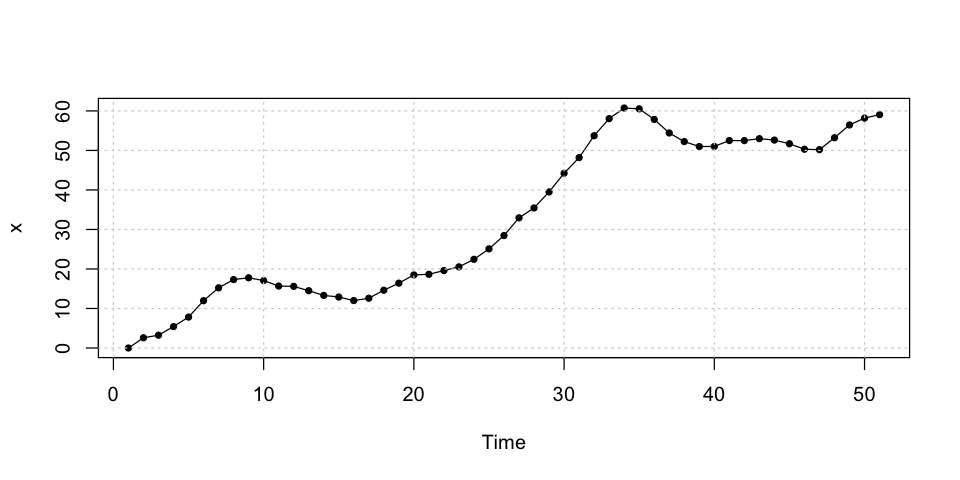

In [41]:
## Gráfica proceso ARMA

options(repr.plot.width=8, repr.plot.height=4)
plot.ts(x,
        type="o",                                  # tipo de gráfico: o - overplotted
        pch=20)                                    # tipo de marcador de los puntos)      

grid()                                             # Agrega malla

## Estimacion modelo ARIMA

[Contenido](#Contenido)

> [`arima{stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/arima.html)

In [42]:
x.fit <- arima(x,                    # Datos de la serie
               order = c(1,1,1),     # Proceso tipo ARIMA(1,1,1) ar(1), diff(1),ma(1)
          include.mean = T)  
x.fit


Call:
arima(x = x, order = c(1, 1, 1), include.mean = T)

Coefficients:
         ar1     ma1
      0.7917  0.2077
s.e.  0.0933  0.1392

sigma^2 estimated as 1.523:  log likelihood = -82.12,  aic = 170.25

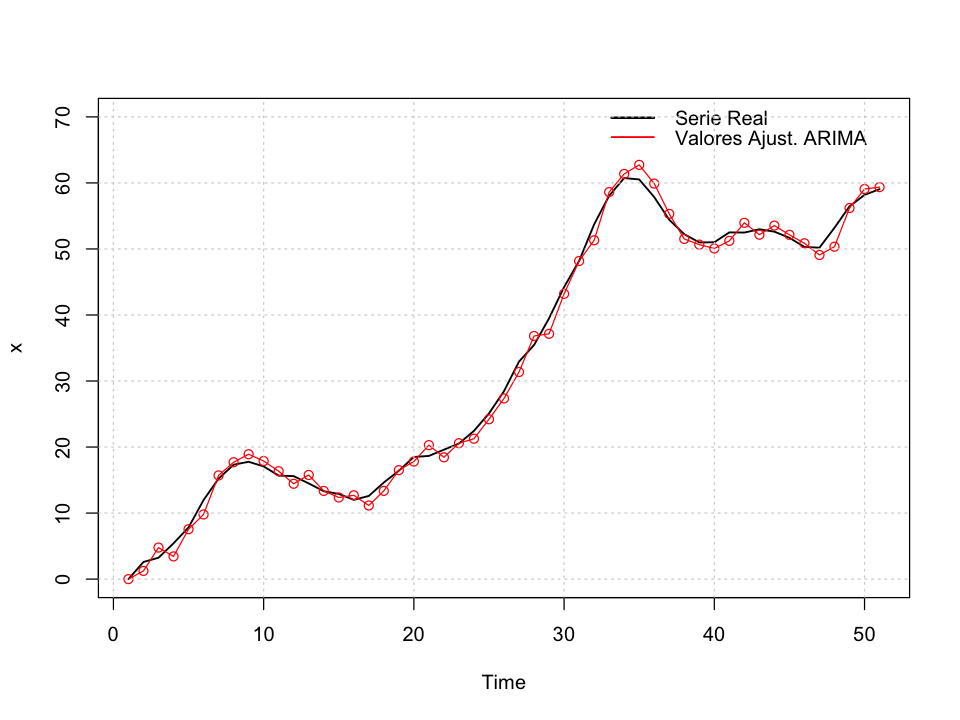

In [43]:
## Gráfica valores ajustados vs reales proceso ARIMA

options(repr.plot.width=8, repr.plot.height=6)


plot(x,                                                   # Datos serie real
     type="l",                                            # Tipo linea
     lwd=1.5,                                             # Grosor linea
     ylim=c(0,70))                                        # Limite eje y     

lines(fitted(x.fit),                                      # Valores ajustado ARIMA
      type="o",                                           # Tipo de grafico
      col="red")                                          # Color linea

legend( "topright",                                        # posicion
        c("Serie Real", "Valores Ajust. ARIMA"),           # texto
        lwd = c(2, 1.5),                                   # grosor lineas
        col = c('black', 'red'),                           # color lineas
        bty = "n")                                         # caja alrededor de la leyenda

grid()                                                     # agrega malla

---

**Ejercicio.--** Convierta el siguiente conjunto de datos en un objeto `ts` de R de frecuencia 1. 

In [44]:
x<- c(  0.00,   -3.16,  -6.95, -10.15,
        -12.44, -13.28, -12.78, -10.91,
        -7.73,  -4.41,  -1.12,   0.07,
        0.17,   -0.79,   1.08,   3.42,
        7.78,    14.66,  21.24,  29.07,
        34.69,   39.19,  43.82,  50.21,
        56.68,   64.14,  69.98,  74.77,
        77.37,   79.04,  81.13,  82.73,
        85.95,   87.87,  91.44,  93.86,
        97.00,   98.37,  99.65, 100.64,
        102.07,  103.80, 106.44, 109.29,
        112.12,  116.59, 121.04, 126.84,
        131.39,  136.67, 143.30)  


**Ejercicio.--** Ajuste un modelo ARIMA para la serie y presente los resultados de la estimación

---

## Pronostico modelo ARIMA

[Contenido](#Contenido)

>[`predict{stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html)

In [45]:
x.for<-predict(x.fit,n.ahead=3)
x.for

$pred
Time Series:
Start = 52 
End = 54 
Frequency = 1 
[1] 59.68508 60.18289 60.57702

$se
Time Series:
Start = 52 
End = 54 
Frequency = 1 
[1] 1.233897 2.758452 4.412063


---

**Ejercicio.--** Utilice el modelo que ajusto para realizar el pronostico de las 5 observaciones y realice la grafica comparativa.

---

[Contenido](#Contenido)